In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/horticultural exports.csv")

In [3]:
import os

# Set the path to the folder containing your Excel files
folder_path = r"C:\Users\HP\Downloads\recent exports"

# Get a list of all Excel files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_data = pd.DataFrame()

# Loop through each Excel file and concatenate the data
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)  # Assuming all sheets have the same structure
    concatenated_data = pd.concat([concatenated_data, df], ignore_index=True)
    




In [4]:
folder_path_mp = r"C:\Users\HP\Downloads\mobile payments"
folder_path_dias = r"C:\Users\HP\Downloads\Diaspora rem"


excel_files_mp = [f for f in os.listdir(folder_path_mp) if f.endswith('.xlsx')]
excel_files_dias = [f for f in os.listdir(folder_path_dias) if f.endswith('.xlsx')]

concatenated_data_mp = pd.DataFrame()
concatenated_data_dias = pd.DataFrame()



# Loop through each Excel file and concatenate the data
for file in excel_files_mp:
    file_path = os.path.join(folder_path_mp, file)
    df = pd.read_excel(file_path)  # Assuming all sheets have the same structure
    concatenated_data_mp= pd.concat([concatenated_data_mp, df], ignore_index=True)
    
# Loop through each Excel file and concatenate the data
for file in excel_files_dias:
    file_path = os.path.join(folder_path_dias, file)
    df = pd.read_excel(file_path)  # Assuming all sheets have the same structure
    concatenated_data_dias = pd.concat([concatenated_data_dias, df], ignore_index=True)

In [5]:
concatenated_data.columns

Index(['Year', 'Month', 'Volume Coffee (Tonnes)',
       'Value Coffee (Kshs. Millions)', 'Average Coffee (Kshs. per Tonne)',
       'Volume Tea  (Tonnes)', 'Value Tea (Kshs. Millions)',
       'Average Tea (Kshs. per Tonne)', 'Volume Horticulture  (Tonnes)',
       'Value Horticulture (Kshs. Millions)',
       'Average Horticulture (Kshs. per Tonne)'],
      dtype='object')

In [6]:
concatenated_data = concatenated_data[['Year', 'Month','Volume Horticulture  (Tonnes)', 
                                        'Value Horticulture (Kshs. Millions)',
                                       'Average Horticulture (Kshs. per Tonne)']]

In [7]:
# Create a new "LastDayOfMonth" column
concatenated_data["date"] = pd.to_datetime(concatenated_data["Year"].astype(str)+concatenated_data["Month"], format="%Y%B")
# Get the list of numerical columns
numerical_columns = concatenated_data.select_dtypes(include='number').columns

for column in numerical_columns:
    concatenated_data[column] = concatenated_data.groupby(['Month'])[column].transform(lambda x: x.fillna(x.mean()))

# concatenated_data.drop("Month_new", axis=1, inplace=True)

concatenated_data["date"] = pd.to_datetime(concatenated_data["date"])

In [8]:
# Create a new "LastDayOfMonth" column
concatenated_data_mp["date"] = pd.to_datetime(concatenated_data_mp["Year"].astype(str)+concatenated_data_mp["Month"], format="%Y%B")
# Get the list of numerical columns
numerical_columns = concatenated_data_mp.select_dtypes(include='number').columns

for column in numerical_columns:
    concatenated_data_mp[column] = concatenated_data_mp.groupby(['Month'])[column].transform(lambda x: x.fillna(x.mean()))

# concatenated_data.drop("Month_new", axis=1, inplace=True)

concatenated_data_mp["date"] = pd.to_datetime(concatenated_data_mp["date"])

In [9]:
concatenated_data_mp

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),date
0,2023,September,336033.0,77.070000,201.580000,660.840000,2023-09-01
1,2023,August,333428.0,77.550000,208.610000,666.630000,2023-08-01
2,2023,July,330912.0,77.210000,202.850000,684.640000,2023-07-01
3,2023,June,328543.0,76.990000,197.420000,643.760000,2023-06-01
4,2023,May,334726.0,77.340000,205.880000,670.440000,2023-05-01
...,...,...,...,...,...,...,...
593,2007,July,681.0,0.268499,0.354298,1.065370,2007-07-01
594,2007,June,527.0,0.175652,0.233661,0.720102,2007-06-01
595,2007,May,447.0,0.107733,0.150000,0.483709,2007-05-01
596,2007,April,362.0,0.054944,0.070000,0.220896,2007-04-01


In [10]:
import pandas as pd

# Assuming "Year" and "Month" are columns in your DataFrame
concatenated_data_dias["date_str"] = concatenated_data_dias["Year"].astype(str) + '-' + concatenated_data_dias["Month"].astype(str).str.zfill(2)
concatenated_data_dias["date"] = pd.to_datetime(concatenated_data_dias["date_str"], format="%Y-%m")

# Set the day to the first day of the month
concatenated_data_dias["date"] = concatenated_data_dias["date"].dt.to_period('M').dt.to_timestamp()

# Drop the intermediate string column if you don't need it
concatenated_data_dias.drop("date_str", axis=1, inplace=True)

In [11]:
concatenated_data_dias

,Year,Month,North America,Europe,Rest of World,Total Remittances (USD '000),date
0,2023,1,"212,010.98","59,838.87","77,541.98","349,391.83",2023-01-01
1,2023,2,"189,034.56","56,820.89","63,317.25","309,172.70",2023-02-01
2,2023,3,"212,079.84","66,569.69","78,330.94","356,980.47",2023-03-01
3,2023,4,"187,888.79","53,533.53","78,894.28","320,316.60",2023-04-01
4,2023,5,"195,185.70","62,490.54","94,429.56","352,105.80",2023-05-01
...,...,...,...,...,...,...,...
709,2004,8,0.00,0.00,0.00,"28,894.00",2004-08-01
710,2004,9,0.00,0.00,0.00,"28,894.00",2004-09-01
711,2004,10,0.00,0.00,0.00,"25,223.00",2004-10-01
712,2004,11,0.00,0.00,0.00,"25,473.00",2004-11-01


In [12]:
concatenated_data = concatenated_data[concatenated_data["Year"]!=2021]
concatenated_data = concatenated_data.sort_values(by="date")

concatenated_data_mp = concatenated_data_mp[concatenated_data_mp["Year"]>2021]
concatenated_data_mp = concatenated_data_mp.sort_values(by="date")

concatenated_data_dias = concatenated_data_dias[concatenated_data_dias["Year"]>2021]
concatenated_data_dias = concatenated_data_dias.sort_values(by="date")

In [13]:
data["date"] = pd.to_datetime(data["date"])
concatenated_data["date"] = pd.to_datetime(concatenated_data["date"])

concatenated_data_mp["date"] = pd.to_datetime(concatenated_data_mp["date"])

concatenated_data_dias["date"] = pd.to_datetime(concatenated_data_dias["date"])


In [14]:
concatenated_data.sort_values(by='date')

,Year,Month,Volume Horticulture (Tonnes),Value Horticulture (Kshs. Millions),Average Horticulture (Kshs. per Tonne),date
9,2022,January,47984.19,10522.145,220564.955,2022-01-01
5,2022,February,41351.44,10732.680,259547.960,2022-02-01
7,2022,March,49557.36,11377.200,229576.510,2022-03-01
3,2022,April,49975.74,10462.450,209350.540,2022-04-01
10,2022,May,49516.59,11833.220,238974.850,2022-05-01
8,2022,June,44821.09,10118.420,225751.370,2022-06-01
1,2022,July,51772.42,9941.350,192020.220,2022-07-01
6,2022,August,39549.51,9322.250,235710.980,2022-08-01
29,2022,September,41634.78,8860.340,212811.020,2022-09-01
2,2022,October,46610.82,9491.540,203633.820,2022-10-01


In [15]:
concatenated_data_dias.drop_duplicates(inplace=True)

In [16]:
# concatenated_data.to_excel("test_data_horti.xlsx", index=False)
# concatenated_data_mp.to_excel("test_data_mp.xlsx", index=False)
# concatenated_data_dias.to_excel("test_data_dias.xlsx", index=False)

In [17]:
data.set_index("date", inplace=True)
concatenated_data.set_index("date", inplace=True)

concatenated_data_mp.set_index("date", inplace=True)
concatenated_data_dias.set_index("date", inplace=True)

In [18]:
import os
os.chdir("../../Time Series Analysis/TimeSeriesclass")

In [19]:
from basicTimeSeries import SARIMAModels
ts = SARIMAModels()

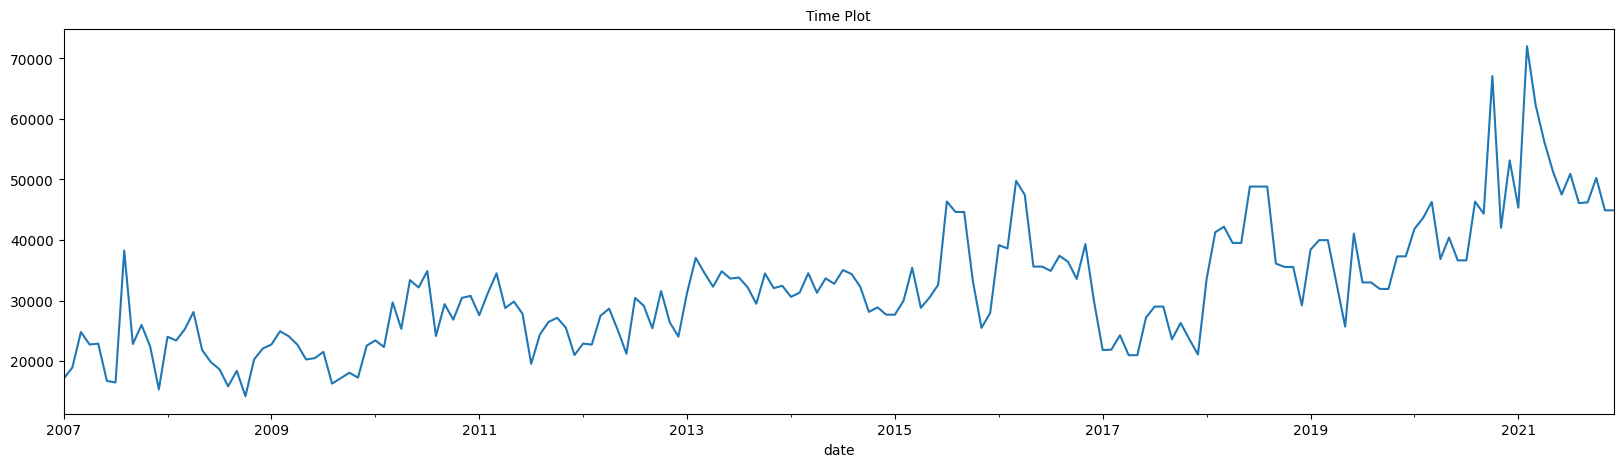

In [20]:
ts.trend_visualizations(data['Volume Horticulture  (Tonnes)'])

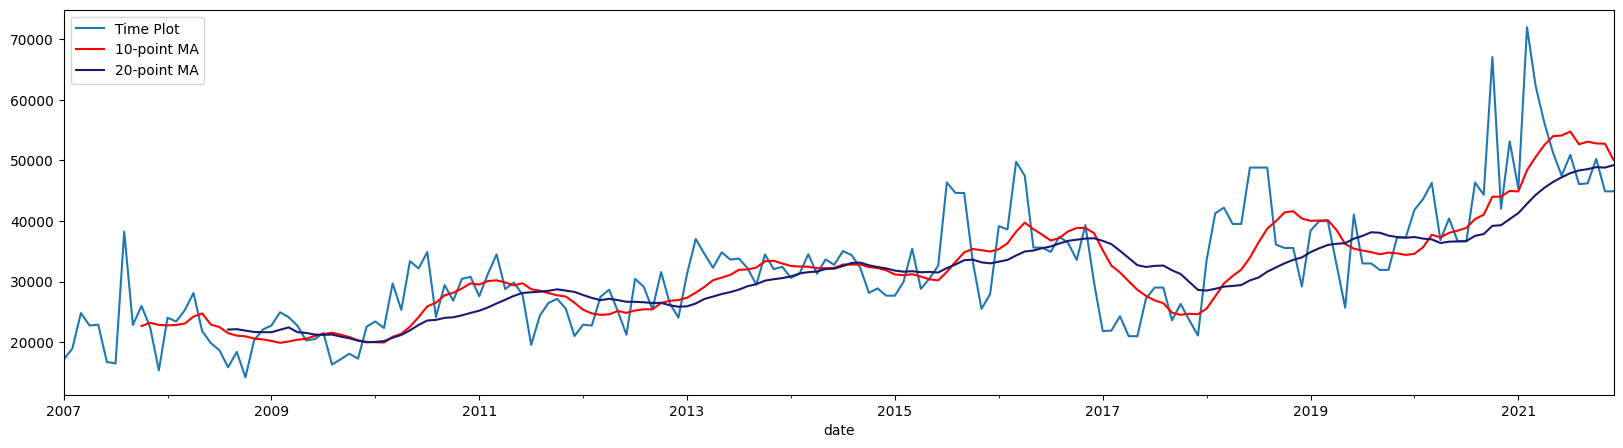

In [21]:
fig, ax = plt.subplots()
data['Volume Horticulture  (Tonnes)'].plot(ax=ax)
data['Volume Horticulture  (Tonnes)'].rolling(10).mean().plot(ax=ax, c='red') # 10-point rolling mean
data['Volume Horticulture  (Tonnes)'].rolling(20).mean().plot(ax=ax, c='midnightblue') # 20-point rlling mean
plt.legend(["Time Plot", "10-point MA", "20-point MA"])
plt.show()

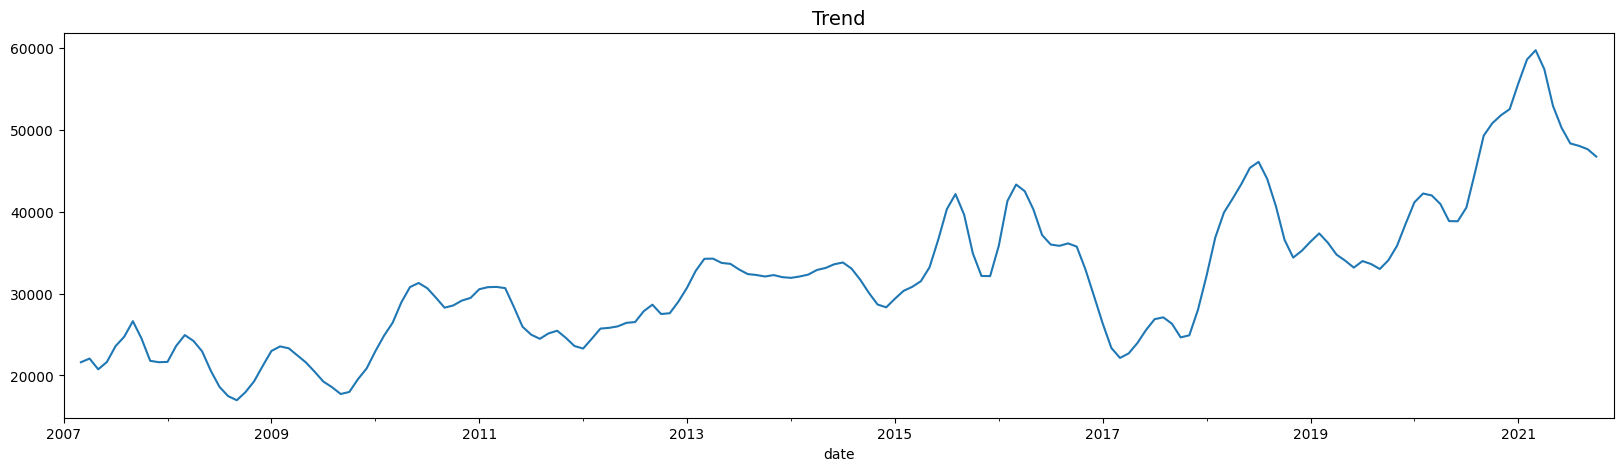

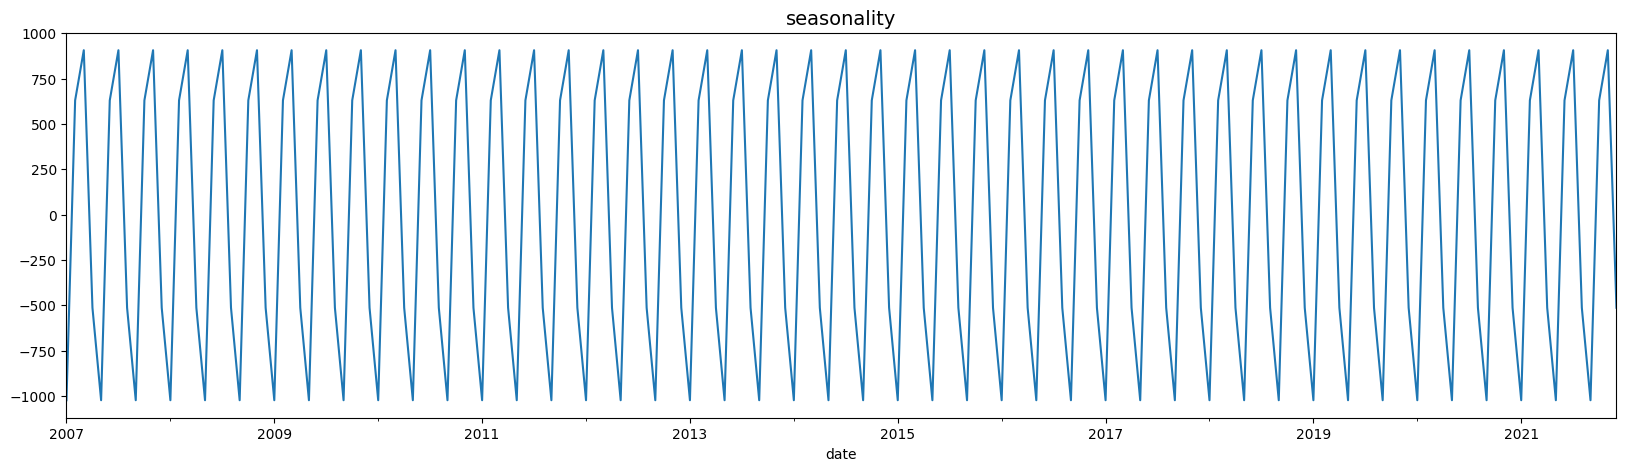

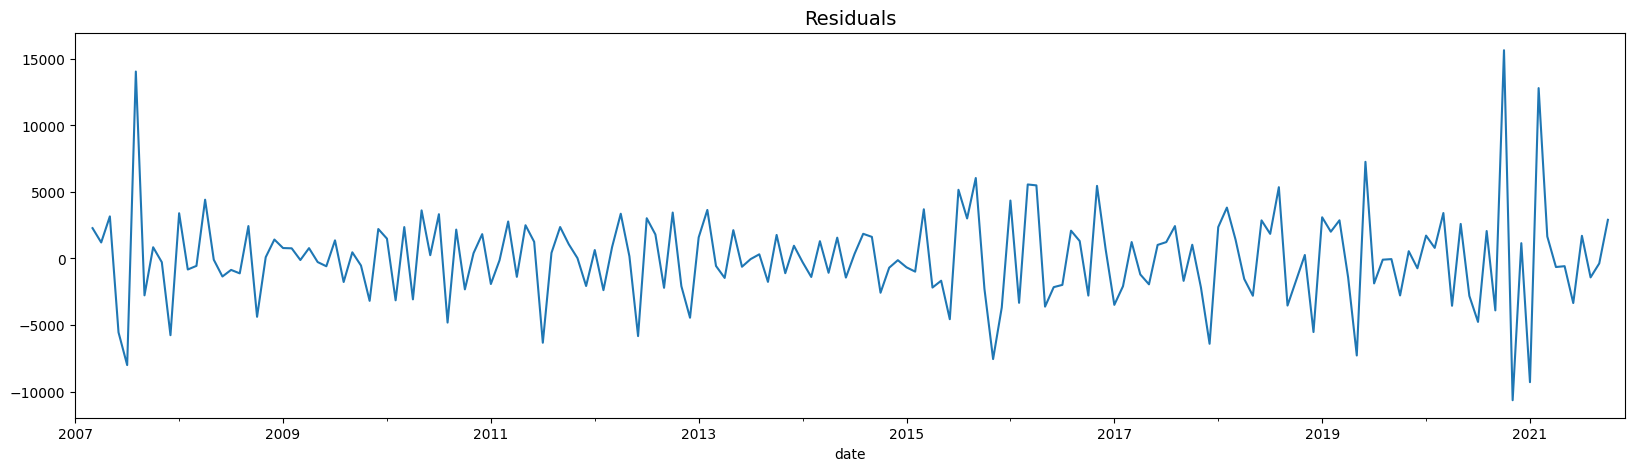

In [22]:
ts.decomposition_plot(data['Volume Horticulture  (Tonnes)'], period=4)

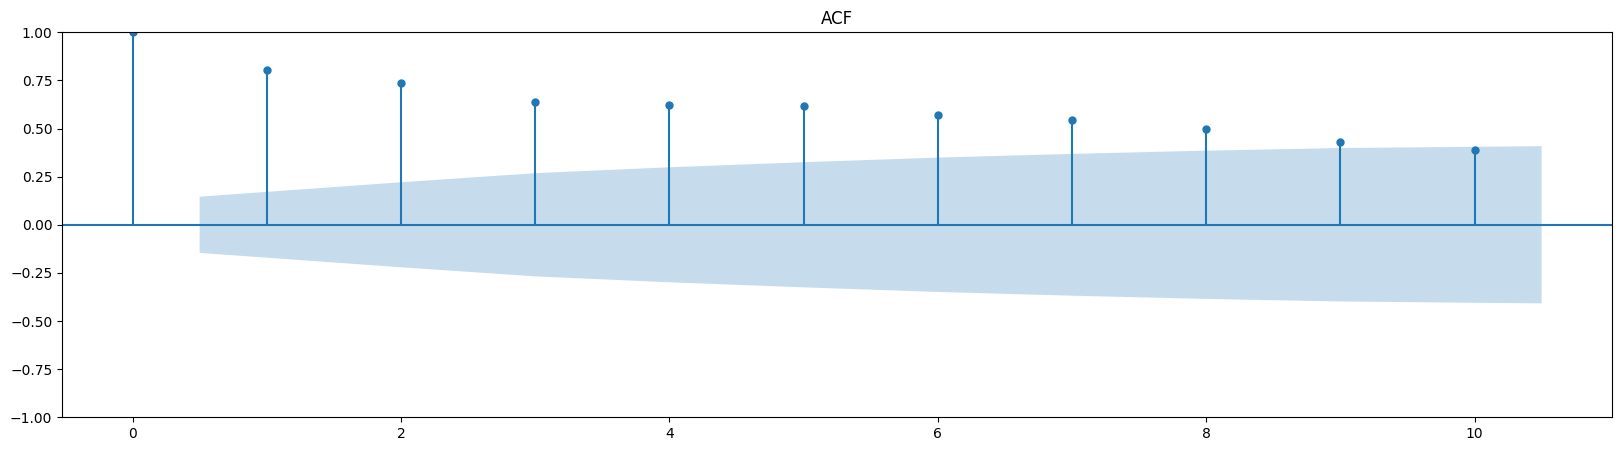

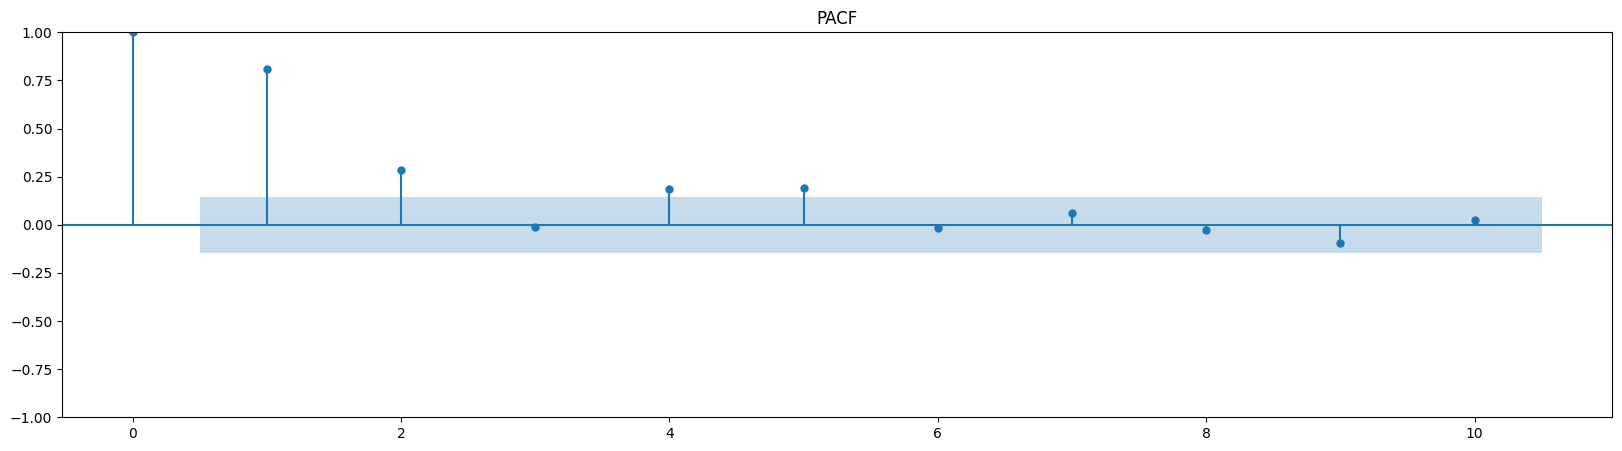

In [23]:
ts.correlation_function(data['Volume Horticulture  (Tonnes)'])

In [24]:
ts.stationarity_check(data['Volume Horticulture  (Tonnes)'])

Augmented Dickey Fuller Test 

null-hypothesis: The data is non-stationary
alternative-hypothesis: The data is stationary 
 -----------------------------------------------
p-value:                = 0.36033367083963586
test-statistic:         = -1.8409402004305406
Number of lag chosen:   = 4
observation:            = 175
critical-values:        = {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
maximized-criteria:     = 3310.564376482536
=> The data is non-stationary.The p-value is 0.36 thus we fail to reject the null hypothesis


----------------------------------------------- 
 ----------------------------------------------- 

KPSS Test for Stationarity 

H0: The time series data is stationary
H1:The time series data is non-stationary 
 -----------------------------------------------
KPSS Statistic: =1.4705875372611854
p-value:        =0.01
num lags:       =8
Critial Values:
   10% :  =0.347
   5% :  =0.463
   2.5% :  =0.574
   1% :  =0.739
Result: Th

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [25]:
ts.model_evaluation(data['Volume Horticulture  (Tonnes)'], order_limit=2)

Choosing the best model from the range provided 
 -----------------------------------------------
ARIMA(0, 0, 0)x(0, 0, 0, 12)season:12 - AIC:4239.829750261326 - LLF:-2118.914875130663
ARIMA(0, 0, 0)x(0, 0, 1, 12)season:12 - AIC:3870.7385911782176 - LLF:-1933.3692955891088
ARIMA(0, 0, 0)x(0, 1, 0, 12)season:12 - AIC:3553.734205444942 - LLF:-1775.867102722471
ARIMA(0, 0, 0)x(0, 1, 1, 12)season:12 - AIC:3273.6612816902853 - LLF:-1634.8306408451426
ARIMA(0, 0, 0)x(1, 0, 0, 12)season:12 - AIC:3574.695488835306 - LLF:-1785.347744417653
ARIMA(0, 0, 0)x(1, 0, 1, 12)season:12 - AIC:3503.018527710112 - LLF:-1748.509263855056
ARIMA(0, 0, 0)x(1, 1, 0, 12)season:12 - AIC:3281.1915387015206 - LLF:-1638.5957693507603
ARIMA(0, 0, 0)x(1, 1, 1, 12)season:12 - AIC:3260.7543769595172 - LLF:-1627.3771884797586
ARIMA(0, 0, 1)x(0, 0, 0, 12)season:12 - AIC:4102.294971305073 - LLF:-2049.1474856525365
ARIMA(0, 0, 1)x(0, 0, 1, 12)season:12 - AIC:3801.037882986582 - LLF:-1897.518941493291
ARIMA(0, 0, 1)x(0, 1, 0

                                     SARIMAX Results                                      
Dep. Variable:      Volume Horticulture  (Tonnes)   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1540.868
Date:                            Sun, 26 Nov 2023   AIC                           3087.735
Time:                                    16:16:16   BIC                           3096.826
Sample:                                01-01-2007   HQIC                          3091.428
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4460      0.055     -8.042      0.000      -0.555      -0.337
ma.S.L12      -0.8822      0.049   

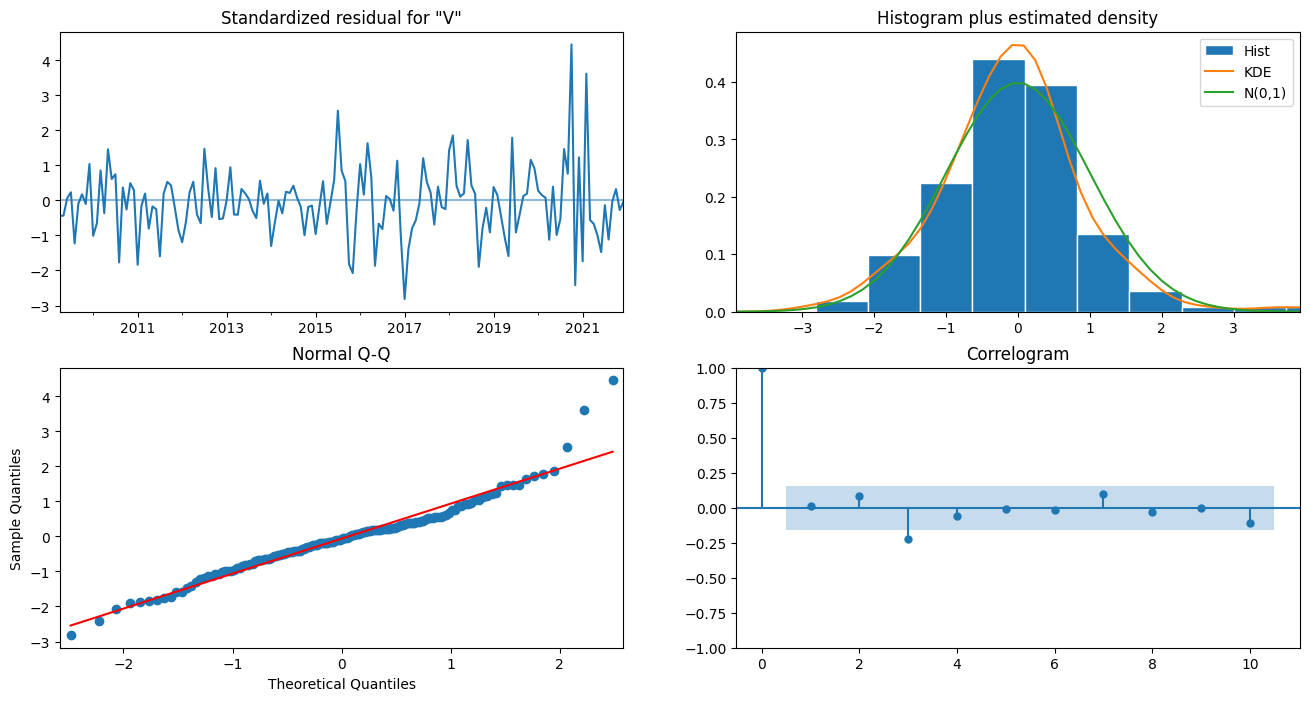



----------------------------------------------- 
 ----------------------------------------------- 

Ljung-Box Test - Checks for Serial Correlation 

null-hypothesis:         The residuals are independently distributed.
alternative-hypothesis:  The residuals are not independently distributed 
 -----------------------------------------------
    lb_stat  lb_pvalue
1  0.000074   0.993154
2  1.195605   0.550019
3  6.406261   0.093434
4  7.682737   0.103916
5  7.684970   0.174474


----------------------------------------------- 
 ----------------------------------------------- 

How predictions compares to actual test data 



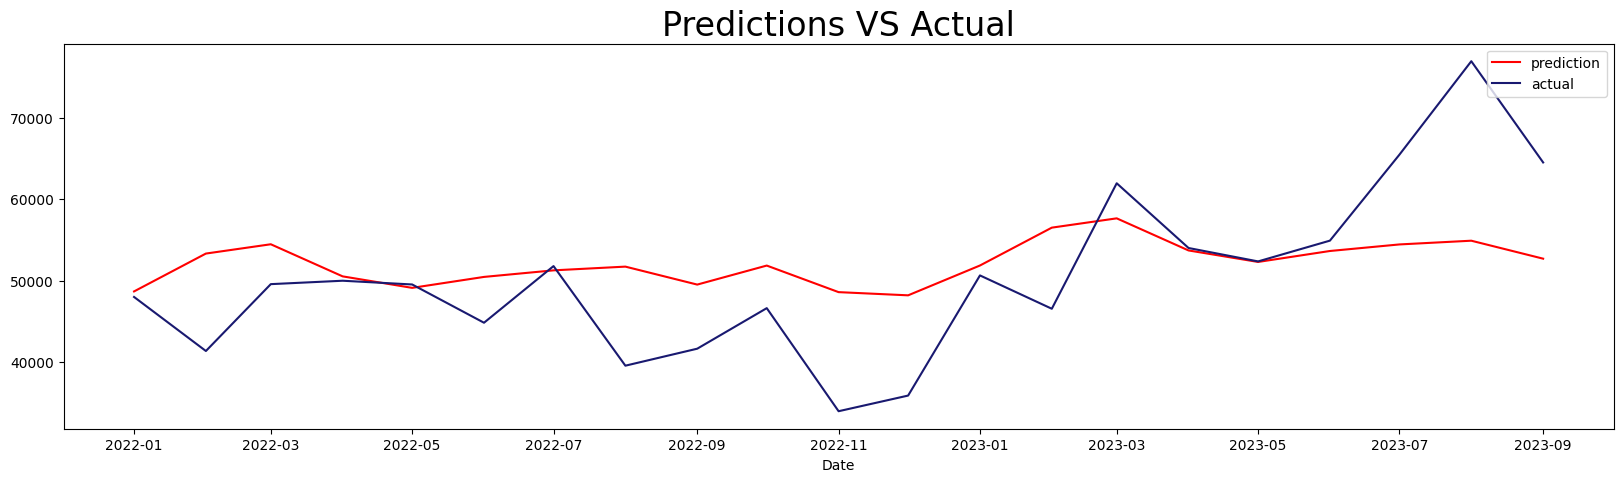

In [26]:
residuals = ts.best_model(data['Volume Horticulture  (Tonnes)'],
              concatenated_data['Volume Horticulture  (Tonnes)'],
              order=(0,1,1), seasonal_order=(0,1,1,12), lags=5)

In [27]:
data.reset_index(inplace=True)
concatenated_data.reset_index(inplace=True)

df = pd.concat([data[['Volume Horticulture  (Tonnes)', "date"]], 
               concatenated_data[['Volume Horticulture  (Tonnes)', "date"]]])

df.set_index("date", inplace=True)

In [28]:
df

,Volume Horticulture (Tonnes)
date,
2007-01-01,17112.39
2007-02-01,18905.81
2007-03-01,24796.49
2007-04-01,22748.93
2007-05-01,22885.72
...,...
2023-05-01,52346.35
2023-06-01,54896.50
2023-07-01,65452.55


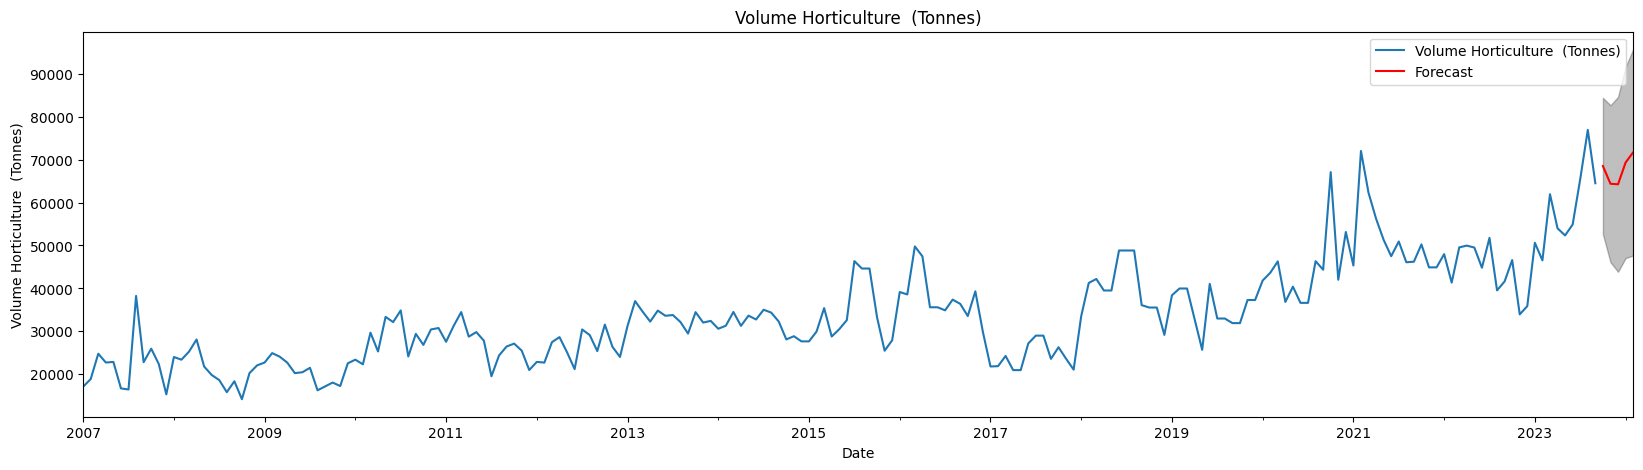

In [29]:
forecast = ts.forecasts(df, order=(0,1,1), seasonal_order=(0,1,1,12), steps=5)

In [30]:
data

,date,Year,Month,Volume Horticulture (Tonnes),Average Horticulture (Kshs. per Tonne),Annual Average Inflation,Diaspora Remittances,Euro ex,Sterling Pound ex,US ex,CB Deposit,CB Savings,CB Overdraft,CB Lending,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2007-01-01,2007,Jan,17112.39,188541.52,6.08,40930.36,90.87,136.91,69.89,4.35,1.42,14.11,13.78,307,0.020992,0.021714,0.064391
1,2007-02-01,2007,Feb,18905.81,175393.06,5.55,39533.07,91.04,136.40,69.62,4.21,1.41,14.05,13.64,307,0.020992,0.021714,0.064391
2,2007-03-01,2007,Mar,24796.49,148545.24,4.99,48561.00,91.77,134.91,69.29,4.19,1.43,13.95,13.56,307,0.020992,0.021714,0.064391
3,2007-04-01,2007,Apr,22748.93,168518.27,4.69,38250.91,92.68,136.40,68.58,4.11,1.35,13.26,13.33,362,0.054944,0.070000,0.220896
4,2007-05-01,2007,May,22885.72,168111.86,4.47,41163.50,90.82,133.31,67.19,4.14,1.57,13.35,13.38,447,0.107733,0.150000,0.483709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021-08-01,2021,Aug,46097.38,211170.46,5.71,312931.20,128.59,150.87,109.24,6.30,2.64,11.38,12.12,304822,68.090000,184.510000,586.520000
176,2021-09-01,2021,Sep,46225.70,214127.42,5.35,309804.43,129.78,151.51,110.15,6.34,2.57,11.34,12.10,305831,67.700000,180.850000,585.380000
177,2021-10-01,2021,Oct,50256.35,198312.28,6.07,337412.55,128.60,151.58,110.86,6.39,2.58,11.33,12.12,295105,66.880000,190.060000,618.140000
178,2021-11-01,2021,Nov,44906.84,233976.45,6.10,320073.62,127.94,150.97,111.92,6.43,2.60,11.41,12.15,299053,67.150000,185.980000,600.970000


In [31]:
len(concatenated_data.columns)

6

In [32]:
data

,date,Year,Month,Volume Horticulture (Tonnes),Average Horticulture (Kshs. per Tonne),Annual Average Inflation,Diaspora Remittances,Euro ex,Sterling Pound ex,US ex,CB Deposit,CB Savings,CB Overdraft,CB Lending,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2007-01-01,2007,Jan,17112.39,188541.52,6.08,40930.36,90.87,136.91,69.89,4.35,1.42,14.11,13.78,307,0.020992,0.021714,0.064391
1,2007-02-01,2007,Feb,18905.81,175393.06,5.55,39533.07,91.04,136.40,69.62,4.21,1.41,14.05,13.64,307,0.020992,0.021714,0.064391
2,2007-03-01,2007,Mar,24796.49,148545.24,4.99,48561.00,91.77,134.91,69.29,4.19,1.43,13.95,13.56,307,0.020992,0.021714,0.064391
3,2007-04-01,2007,Apr,22748.93,168518.27,4.69,38250.91,92.68,136.40,68.58,4.11,1.35,13.26,13.33,362,0.054944,0.070000,0.220896
4,2007-05-01,2007,May,22885.72,168111.86,4.47,41163.50,90.82,133.31,67.19,4.14,1.57,13.35,13.38,447,0.107733,0.150000,0.483709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021-08-01,2021,Aug,46097.38,211170.46,5.71,312931.20,128.59,150.87,109.24,6.30,2.64,11.38,12.12,304822,68.090000,184.510000,586.520000
176,2021-09-01,2021,Sep,46225.70,214127.42,5.35,309804.43,129.78,151.51,110.15,6.34,2.57,11.34,12.10,305831,67.700000,180.850000,585.380000
177,2021-10-01,2021,Oct,50256.35,198312.28,6.07,337412.55,128.60,151.58,110.86,6.39,2.58,11.33,12.12,295105,66.880000,190.060000,618.140000
178,2021-11-01,2021,Nov,44906.84,233976.45,6.10,320073.62,127.94,150.97,111.92,6.43,2.60,11.41,12.15,299053,67.150000,185.980000,600.970000
